# Lec 20 - Polynomial Regression and Step Functions
## CMSE 381 - Fall 2022
## Nov 4, 2022



In this module we are going to implement polynomial regression and step functions as discussed in class.

In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time


# ML imports we've used previously
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


import statsmodels.api as sm


# 0. Loading in the data

We're going to use the `Wage` data used in the book, so note that many of your plots can be checked by looking at figures in the book.

In [2]:
df = pd.read_csv('Wage.csv', index_col =0 )
df.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 231655 to 453557
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   sex         3000 non-null   object 
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  logwage     3000 non-null   float64
 11  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 304.7+ KB


In [4]:
df.describe()

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


Here's the plot we used multiple times in class to look at a single variable:  `age` vs `wage`

Text(0, 0.5, 'Wage')

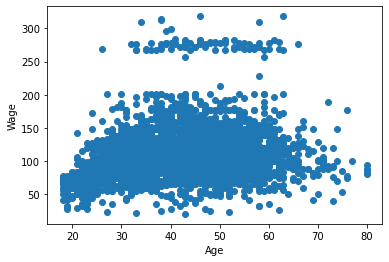

In [5]:
plt.scatter(df.age,df.wage)
plt.xlabel('Age')
plt.ylabel('Wage')

&#9989; **<font color=red>Do this:</font>** Modify the plot above so that the people earning above 250 are in a different color and/or symbol set.




Text(0, 0.5, 'Wage')

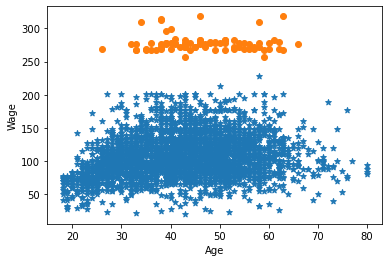

In [6]:
# Your code here 
plt.scatter(df.age[df.wage <=250], df.wage[df.wage<=250],marker = '*')
plt.scatter(df.age[df.wage >250], df.wage[df.wage>250])

plt.xlabel('Age')
plt.ylabel('Wage')

# 1. Polynomial Regression 

Our first step is to build a polynomial regression model using the age data to predict wage.  So, as in class, we are in $p=1$ world here where we are going to fit the model
$$
\texttt{wage} = \beta_0 + \beta_1 \texttt{age} + \beta_2 \texttt{age}^2 + \cdots + \beta_p \texttt{age}^p +\varepsilon.
$$

The trick here is to build a matrix $X$ which has a column containing `age`, one with `age^2`, one with `age^3`, etc.  Then we hand this to your favorite regression tool (it doesn't need to know it's getting polynomial matrix inputs, it just sees a matrix of features and does it's thing). 

So, here's some code to take our $\texttt{age}$ data column and create a bunch of new columns in our data frame that are simply each the $k$th power of the `age` column

In [7]:
# Here's the column I care about
df.age

231655    18
86582     24
161300    45
155159    43
11443     50
          ..
376816    44
302281    30
10033     27
14375     27
453557    55
Name: age, Length: 3000, dtype: int64

In [8]:
# Here's one way to get out the pandas series that squares
# each entry
df.age.apply(lambda x: x**2)

231655     324
86582      576
161300    2025
155159    1849
11443     2500
          ... 
376816    1936
302281     900
10033      729
14375      729
453557    3025
Name: age, Length: 3000, dtype: int64

&#9989; **<font color=red>Do this:</font>** Use the code above (or any other tricks you might know) to generate a data frame called `polydf` with 4 columns, where the $k$th column has $\texttt{age}^k$




In [10]:
# Your code here #
#polydf = 

Did I need to make you do that? It turns out no. As with many things we've talked about in class, there is already some automated code for us to work with.  In this case, the only difference is that it will hand us back a matrix rather than a data frame. 

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly = PolynomialFeatures(4)
X = poly.fit_transform(df.age.values.reshape(-1,1)) #<--- this nastyness is because it wants to be handed a matrix
X[:10,:]

array([[1.000000e+00, 1.800000e+01, 3.240000e+02, 5.832000e+03,
        1.049760e+05],
       [1.000000e+00, 2.400000e+01, 5.760000e+02, 1.382400e+04,
        3.317760e+05],
       [1.000000e+00, 4.500000e+01, 2.025000e+03, 9.112500e+04,
        4.100625e+06],
       [1.000000e+00, 4.300000e+01, 1.849000e+03, 7.950700e+04,
        3.418801e+06],
       [1.000000e+00, 5.000000e+01, 2.500000e+03, 1.250000e+05,
        6.250000e+06],
       [1.000000e+00, 5.400000e+01, 2.916000e+03, 1.574640e+05,
        8.503056e+06],
       [1.000000e+00, 4.400000e+01, 1.936000e+03, 8.518400e+04,
        3.748096e+06],
       [1.000000e+00, 3.000000e+01, 9.000000e+02, 2.700000e+04,
        8.100000e+05],
       [1.000000e+00, 4.100000e+01, 1.681000e+03, 6.892100e+04,
        2.825761e+06],
       [1.000000e+00, 5.200000e+01, 2.704000e+03, 1.406080e+05,
        7.311616e+06]])

&#9989; **<font color=red>Q:</font>** What other major difference do you notice between the dataframe you constructed above and the matrix provided here? Why do you think that is happening?

*Your answer here*





In [13]:
# Your code here #

&#9989; **<font color=red>Do this:</font>** Train a linear regression model on these features. What are the coefficients? 


In [14]:
# Your code here #
y = df.wage
model = LinearRegression()
model.fit(X,y)

model.coef_

array([ 0.00000000e+00,  2.12455205e+01, -5.63859313e-01,  6.81068771e-03,
       -3.20383038e-05])

&#9989; **<font color=red>Q:</font>** What is the equation for the polynomial that you learned? 

*Your equation here*

&#9989; **<font color=red>Do this:</font>** Draw the polynomial that you learned on top of the age vs wage plot. Note that you can either do this using the polynomial you just figured out, or by using the model you just set up to predict the values. In either case, use the vector of ages `t` below.

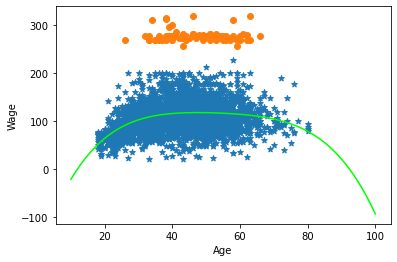

In [15]:
# Your code here #
t = np.linspace(10,100,100)
polyfit = -184.15 + 2.12e+01*t - 5.64e-01*t**2 + 6.81e-03*t**3 - 3.2e-05*t**4


plt.scatter(df.age[df.wage <=250], df.wage[df.wage<=250],marker = '*')
plt.scatter(df.age[df.wage >250], df.wage[df.wage>250])

plt.xlabel('Age')
plt.ylabel('Wage')

plt.plot(t,polyfit, color = "lime")


![Stop Icon](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Vienna_Convention_road_sign_B2a.svg/180px-Vienna_Convention_road_sign_B2a.svg.png)

Great, you got to here! Hang out for a bit, there's more lecture before we go on to the next portion. 

# 2. Step functions

Now let's try to use step functions to learn a model. Like with the polynomial example above, all we're going to do is build a data frame or feature matrix that has the step function values in each column, and then pass that matrix to our favorite linear modeling function. 

First off, it's easy to find the locations for the knots, which are the places where we switch step functions. Here's the pandas `cut` command, which in this case on some toy data, gives me 3 equal-sized bins, where here, equal-sized means that the width of the intervals are all the same.

In [ ]:
fakeData = np.array([1, 7, 3, 5, 4, 6, 3, 3 , 10,2])
cuts, knots = pd.cut(fakeData, 3,retbins=True, right = False)
print(cuts)
print(knots)

The `retbins=True` tells the command to return the breakpoints in the bins, which I saved in my output as `knots`. The `right=False` command makes it so that we have intervals closed on the bottom (e.g. $[3,5)$, $[5,7)$, etc), which I am simply using here to make the results match with the textbook notation. 

We can either see the intervals chosen by looking at the `categories` saved to the cuts, or by looking at the knots list. 

In [ ]:
print(cuts.categories)
print(knots)

I can find out what bin the $i$th entry is mapped to by just checking the cuts list. 

In [ ]:
i = 5
print('Entry is:', fakeData[i])
print('This comes from bin:', cuts[i])

We can also see how many data points ended up in each interval.

In [ ]:
cuts.value_counts()

Once we've got this list of bins, we can build the data frame that keeps track of all the true/false values for whether a data point is in a particular interval by using the dummy variable trick. 

In [ ]:
X_stepFunction = pd.get_dummies(cuts)
X_stepFunction

In [ ]:
# This might be easier to check also if we draw the 
# input X data next to the dummy variables we made
X_stepFunction['X'] = fakeData
X_stepFunction

Then, if I want to figure out which bin is assigned for some other matrix of values that I want to test, I can use the `np.digitize` function as follows.

In [ ]:
u = np.array([4, 6, -7, 8, 13, 25, 0, 1, np.pi])
print(u)
np.digitize(u,knots)

&#9989; **<font color=red>Q:</font>** What interval does each entry in the array above correspond to? In particular, we had what do the entries with 0 and 4 mean? 

*Your answer here* 

&#9989; **<font color=red>Do this:</font>**
- Use the `cut` tool above to create a feature matrix for the `age` data where each column corresponds to a step function using 4 bins. 
- Drop the first bin.... remember we don't need all of our dummy variables, so we'll just use the remaining 3 to predict.
- Pass this matrix to a linear regression model. 

What is the equation for your learned model? 

In [ ]:
# Your code here #

&#9989; **<font color=red>Do this:</font>** Our goal is to plot the learned equation on top of the scatter plot data. To do this:
- Plot the  original sampled data.
- Using your linear regression model from above, predict the values on 
```
t = np.linspace(10,100,100)
```
    to get a vector `y`. 
- Plot `(t,y)` on the figure. 

What range of ages has the highest predicted wage?



-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.